<a href="https://colab.research.google.com/github/PotatoSpudowski/Graph_convolution_basics/blob/master/Graph_embedding_using_GCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import networkx as nx
from networkx import karate_club_graph, to_numpy_matrix
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [0]:
G = karate_club_graph()

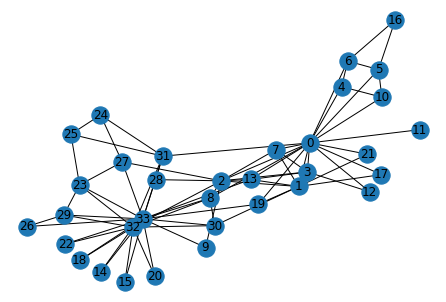

In [3]:
nx.draw(G, with_labels=True)

In [0]:
order = sorted(list(G.nodes()))
A = to_numpy_matrix(G, nodelist=order)

In [0]:
I = np.eye(G.number_of_nodes())
A_hat = A + I

In [0]:
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

In [0]:
weight1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 5))
weight2 = np.random.normal(loc=0, size=(weight1.shape[1], 2))

In [0]:
def GraphConv_layer(A_hat, D_hat, X, W):
    D_hat_inv = np.sqrt(D_hat**-1)
    return (D_hat_inv @ A_hat @ D_hat_inv @ X @ W)

In [60]:
H1 = GraphConv_layer(A_hat, D_hat, I, weight1)
H2 = GraphConv_layer(A_hat, D_hat, H1, weight2)
out = H2
out #output embedding

matrix([[-0.67721312, -0.40707943],
        [ 0.57056621, -0.30071189],
        [ 1.37841414, -0.44237124],
        [ 1.12352243, -0.28721953],
        [-1.78556644,  0.09669079],
        [-1.16203612,  0.40471229],
        [-1.32990532,  0.45313735],
        [ 1.1254949 , -0.16822896],
        [ 0.49198103, -0.24439052],
        [ 1.20902464, -0.48978883],
        [-1.58119305,  0.05608087],
        [-0.74500798, -0.44218968],
        [ 0.55113543, -0.13887186],
        [ 1.21298719, -0.31627647],
        [ 0.91260528, -0.5041871 ],
        [ 1.13143282, -0.67014553],
        [-0.83850191,  0.56455345],
        [ 0.09061223, -0.11628086],
        [ 1.21022594, -0.32890722],
        [ 0.40364284, -0.38899007],
        [ 0.70683518, -0.37379919],
        [ 0.40352142,  0.08252792],
        [ 0.47542259, -0.15063521],
        [ 2.01228137, -0.25741065],
        [ 1.63056831, -0.01110197],
        [ 1.707159  , -0.0523723 ],
        [ 2.13166557, -0.39099292],
        [ 1.61134881, -0.106

In [38]:
out.shape

(34, 2)

In [0]:
out = out.tolist()

x_list = []
y_list = []
for i in range(len(out)):
    x_list.append(out[i][0])
    y_list.append(out[i][1])

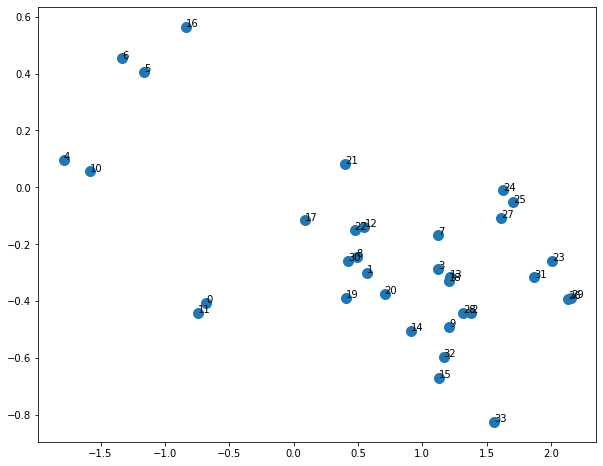

In [65]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(x_list, y_list, s=100)

for i in range(len(out)):
    plt.annotate(str(i), (x_list[i], y_list[i]))